<a href="https://colab.research.google.com/github/shanzabakhtds/OASIS-INFOBYTE/blob/main/UNEMPLOYMENT_ANALYSIS_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**

The problem at hand involves the analysis of the unemployment rate, specifically focusing on the impact of the Covid-19 pandemic on employment opportunities.



> The objective is to investigate the correlation between lockdown measures and the subsequent surge in the unemployment rate.



> The project aims to provide insights into the dynamics of unemployment during the pandemic, exploring patterns, trends, and potential factors contributing to the observed increase in unemployment.




# **Libraries**

In [1]:
# for reshaping arrays and working with numerical data
import numpy as np

#used for working with datasets, offering functions for data analysis, cleaning, exploration, and manipulation
import pandas as pd

#used for pie charts for visualizing results
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from collections import namedtuple
from IPython.display import display

# **Loading Dataset**

In [3]:
df = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

# **Exploring The DataSet**

In [86]:
print("Rows from start are: ")
print("\n")
df.head()

Rows from start are: 




,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,5,May


In [88]:
print("Rows from bottom: ")
print("\n")

df.tail()

Rows from bottom: 




,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month,Month_int,Month_name
262,West Bengal,2020-06-30,M,7.29,30726310,40.39,East,22.9868,87.855,6,6,Jun
263,West Bengal,2020-07-31,M,6.83,35372506,46.17,East,22.9868,87.855,7,7,Jul
264,West Bengal,2020-08-31,M,14.87,33298644,47.48,East,22.9868,87.855,8,8,Aug
265,West Bengal,2020-09-30,M,9.35,35707239,47.73,East,22.9868,87.855,9,9,Sep
266,West Bengal,2020-10-31,M,9.98,33962549,45.63,East,22.9868,87.855,10,10,Oct


Checking Column Names


In [9]:
df.columns


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [7]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

**Rows and Columns In dataset are:**

In [81]:
print("Shape of the data set ",df.shape)


Shape of the data set  (267, 12)


In [82]:
print("Size of the data set is=",df.size)

Size of the data set is= 3204


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [11]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


# **Data exploratory Analysis**

In [20]:
# Statistics by Region

region_stats = df.groupby(['Region'])[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].mean().reset_index()
region_stats = round(region_stats, 2)
region_stats

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


from matplotlib import pyplot as plt
region_stats['Estimated Unemployment Rate'].plot(kind='hist', bins=20, title='Estimated Unemployment Rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
region_stats['Estimated Employed'].plot(kind='hist', bins=20, title='Estimated Employed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
region_stats['Estimated Labour Participation Rate'].plot(kind='hist', bins=20, title='Estimated Labour Participation Rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
region_stats.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
region_stats.plot(kind='scatter', x='Estimated Unemployment Rate', y='Estimated Employed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
region_stats.plot(kind='scatter', x='Estimated Employed', y='Estimated Labour Participation Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
region_stats['Estimated Unemployment Rate'].plot(kind='line', figsize=(8, 4), title='Estimated Unemployment Rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
region_stats['Estimated Employed'].plot(kind='line', figsize=(8, 4), title='Estimated Employed')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
region_stats['Estimated Labour Participation Rate'].plot(kind='line', figsize=(8, 4), title='Estimated Labour Participation Rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(region_stats['Region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(region_stats, x='Estimated Unemployment Rate', y='Region', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(region_stats['Region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(region_stats, x='Estimated Employed', y='Region', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(region_stats['Region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(region_stats, x='Estimated Labour Participation Rate', y='Region', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# **Correlation Heatmap**

Text(0.5, 1.0, 'Correlation Heatmap')

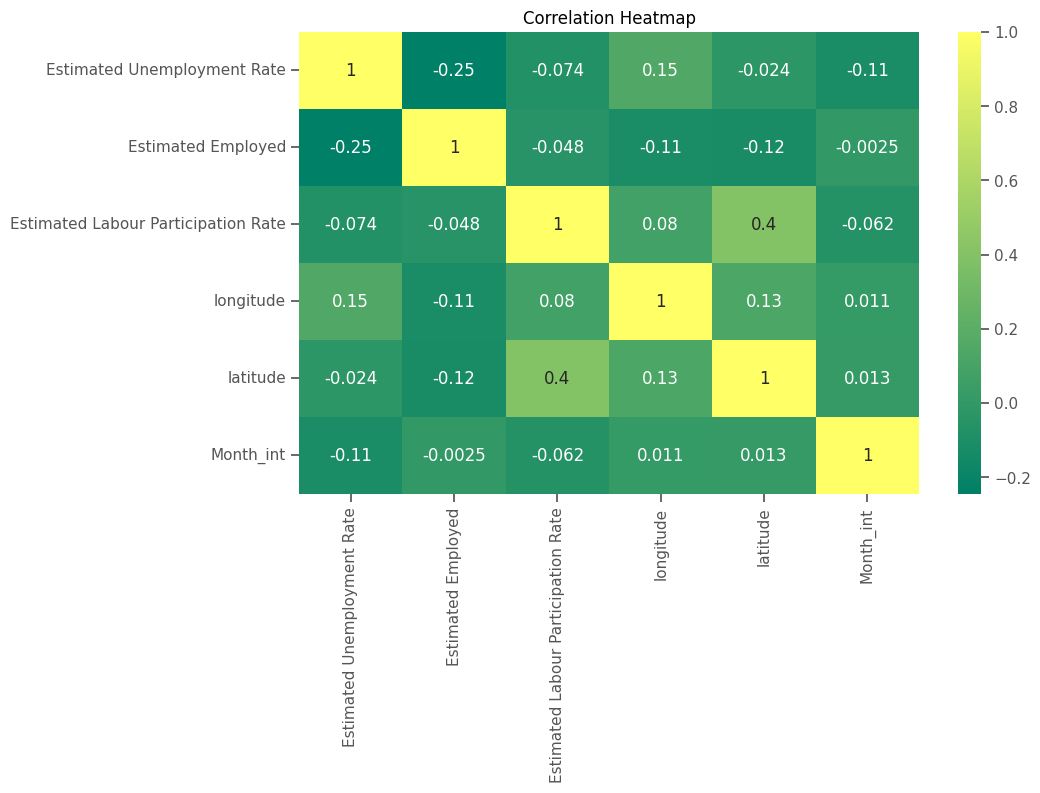

In [49]:
heat_maps = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'longitude', 'latitude', 'Month_int']]
heat_maps = heat_maps.corr()
plt.figure(figsize=(10, 6))
sns.set_context('notebook', font_scale=1)
sns.heatmap(heat_maps, annot=True, cmap='summer')
plt.title("Correlation Heatmap")

# Box plot of Unemployment Rate by Region

In [25]:
import plotly.express as px

fig = px.box(df, x='Region', y='Estimated Unemployment Rate', color='Region',
             title='\t Unemployment rate', template='plotly')

# Update layout to make the title bold and centered
fig.update_layout(
    title=dict(text='\t<b>Unemployment Rate</b>', x=0.5, y=0.95, xanchor='center', yanchor='top'),
    xaxis={'categoryorder': 'total descending'}
)

fig.show()



# Box plot of Unemployment Rate by State

In [33]:
fig = px.box(df, x='States', y='Estimated Unemployment Rate', color='States', title='Unemployment rate', template='plotly')
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Update layout to make the title bold and centered
fig.update_layout(
    title=dict(text='\t<b>Unemployment Rate</b>', x=0.5, y=0.95, xanchor='center', yanchor='top'),
    xaxis={'categoryorder': 'total descending'}
)

fig.show()

# **`Scatter matrix`**

In [31]:
fig = px.scatter_matrix(df, template='plotly',
                        dimensions=['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate'],
                        color='Region')
fig.show()


# Bar plot of average Unemployment Rate by State


In [37]:
import plotly.express as px

# Assuming the correct column name is 'Estimated Unemployment Rate'
plot_ump = df[['Estimated Unemployment Rate', 'States']]
df_unemp = plot_ump.groupby('States').mean().reset_index()
df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')

fig = px.bar(df_unemp, x='States', y='Estimated Unemployment Rate', color='States',
             title='Average Unemployment Rate in each state', template='plotly')

# Update layout to make the title bold and bring it to the front
fig.update_layout(
    title=dict(text='<b>Average Unemployment Rate in each state</b>', x=0.5, y=0.95, xanchor='center', yanchor='top', pad=dict(b=0)),
    showlegend=False  # Optional: Hide the legend
)

fig.show()


In [46]:
import plotly.express as px
import calendar

# As the column names are 'Estimated Unemployment Rate', 'States', 'Date'
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Month'] = df['Date'].dt.month
df['Month_int'] = df['Month'].apply(lambda x: int(x))
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])

fig = px.bar(df, x='Region', y='Estimated Unemployment Rate', animation_frame='Month_name', color='States',
             title='Unemployment rate across region from Jan.2020 to Oct.2020', height=700, template='plotly')

fig.update_layout(
    xaxis={'categoryorder': 'total descending'},
    title=dict(text='<b>Unemployment rate across region from Jan.2020 to Oct.2020</b>', x=0.5, y=0.95, xanchor='center', yanchor='top'),
)


fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()


In [100]:
import plotly.express as px

unemplo_df = df[['States', 'Region', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
unemplo = unemplo_df.groupby(['Region', 'States'])['Estimated Unemployment Rate'].mean().reset_index()

fig = px.sunburst(unemplo, path=['Region', 'States'], values='Estimated Unemployment Rate',
                  color_continuous_scale='Greens',  # Change color to green
                  title='Unemployment rate in each region and state',
                  height=650, template='ggplot2')

fig.update_layout(
    xaxis={'categoryorder': 'total descending'},
    title=dict(text='<b>Unemployment rate in each region and state</b>', x=0.5, y=0.95, xanchor='center', yanchor='top'),
)

fig.show()


**Impact of Lockdown on States Estimated Employed**

On 24 March 2020, the Government of India under Prime Minister Narendra Modi ordered a nationwide lockdown for 21 days

In [51]:
fig = px.scatter_geo(df,'longitude', 'latitude', color="Region",
                     hover_name="States", size="Estimated Unemployment Rate",
                     animation_frame="Month_name",scope='asia',template='plotly',title='Impack of lockdown on employement across regions')

fig.update_layout(
    xaxis={'categoryorder': 'total descending'},
    title=dict(text='<b>Unemployment rate in each region and state</b>', x=0.5, y=0.95, xanchor='center', yanchor='top'),
)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#6dd5ed",
    showocean=True)

fig.show()

**Analyzing the estimated unemployment rates in different states during and before a presumed lockdown period.**

In [53]:
lock = df[(df['Month_int'] >= 4) & (df['Month_int'] <=7)]
bf_lock = df[(df['Month_int'] >= 1) & (df['Month_int'] <=4)]
g_lock = lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
g_bf_lock = bf_lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
g_lock['Unemployment Rate before lockdown'] = g_bf_lock['Estimated Unemployment Rate']
g_lock.columns = ['States','Unemployment Rate after lockdown','Unemployment Rate before lockdown']
g_lock.head(5)


,States,Unemployment Rate after lockdown,Unemployment Rate before lockdown
0,Andhra Pradesh,12.3975,9.4025
1,Assam,6.2450,6.2250
2,Bihar,30.8025,20.7425
3,Chhattisgarh,9.6025,7.2450
4,Delhi,24.3600,17.6975


In [54]:
# percentage change in unemployment rate

g_lock['percentage change in unemployment'] = round(g_lock['Unemployment Rate after lockdown'] - g_lock['Unemployment Rate before lockdown']/g_lock['Unemployment Rate before lockdown'],2)
plot_per = g_lock.sort_values('percentage change in unemployment')

# Percentage Change In Unemployment After Lockdown

In [69]:
# Column names are 'States', 'percentage change in unemployment'
fig = px.bar(plot_per, x='States', y='percentage change in unemployment', color='percentage change in unemployment',
             title='Percentage Change in Unemployment in Each State After Lockdown', template='ggplot2')
#Just to bold title
fig.update_layout(
    title=dict(text='<b>Percentage Change in Unemployment in Each State After Lockdown</b>', x=0.5, y=0.95, xanchor='center', yanchor='top'),
    paper_bgcolor='rgba(0, 128, 0, 0.05)',  # Dark green background
    plot_bgcolor='rgba(0, 128, 0, 0.05)',  # Dark green plot area
)

fig.show()


**Areas Experiencing the Greatest Unemployment Challenges**


> Puducherry

> Jharkhand

> Bihar

> Haryana

> Tripura







In [57]:
# function to sort value based on impact

def sort_impact(x):
    if x <= 10:
        return 'impacted States'
    elif x <= 20:
        return 'hard impacted States'
    elif x <= 30:
        return 'harder impacted States'
    elif x <= 40:
        return 'hardest impacted States'
    return x

In [58]:
plot_per['impact status'] = plot_per['percentage change in unemployment'].apply(lambda x:sort_impact(x))

In [60]:
fig = px.bar(plot_per, y='States',x='percentage change in unemployment',color='impact status',
            title='Impact of lockdown on employment across states',template='ggplot2',height=650)

fig.update_layout(
    xaxis={'categoryorder': 'total descending'},
    title=dict(text='<b>Unemployment rate in each region and state</b>', x=0.5, y=0.95, xanchor='center', yanchor='top'),
)

fig.show()